# Machine Learning Indonesian.AI
Pertemuan - 5 Support Vector Machine

## Libraries

In [285]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

## Load Datasets

In [286]:
df = pd.read_csv('pima_diabetes.csv', names=['preg_times', 'glucose', 'blood_press', 
                                             'skin_thickness', 'insulin', 'BMI', 'pedigree', 'age', 'class'])
df.head()

,preg_times,glucose,blood_press,skin_thickness,insulin,BMI,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Explore Data

In [389]:
print(f'Total data : {df.shape[0]}')
print(f'Total column : {df.shape[1]}')

Total data : 768
Total column : 9


### Unique data

In [393]:
df.nunique()

preg_times         17
glucose           136
blood_press        47
skin_thickness     51
insulin           186
BMI               248
pedigree          517
age                52
class               2
dtype: int64

### Missing Value

In [394]:
df.isna().sum()

preg_times        0
glucose           0
blood_press       0
skin_thickness    0
insulin           0
BMI               0
pedigree          0
age               0
class             0
dtype: int64

In [288]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
preg_times,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
blood_press,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
skin_thickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
pedigree,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [289]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   preg_times      768 non-null    int64  
 1   glucose         768 non-null    int64  
 2   blood_press     768 non-null    int64  
 3   skin_thickness  768 non-null    int64  
 4   insulin         768 non-null    int64  
 5   BMI             768 non-null    float64
 6   pedigree        768 non-null    float64
 7   age             768 non-null    int64  
 8   class           768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Check Outliers

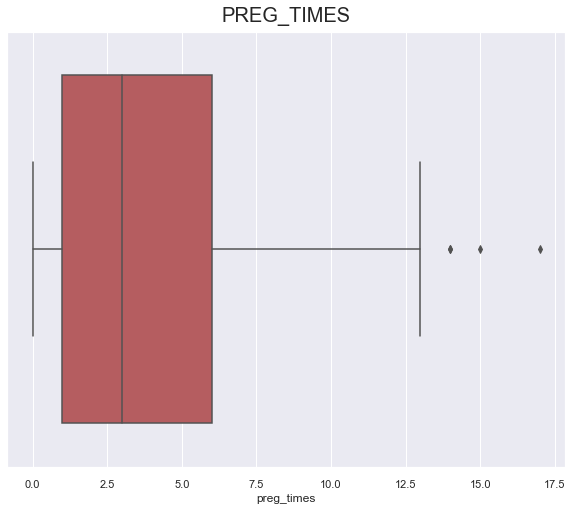

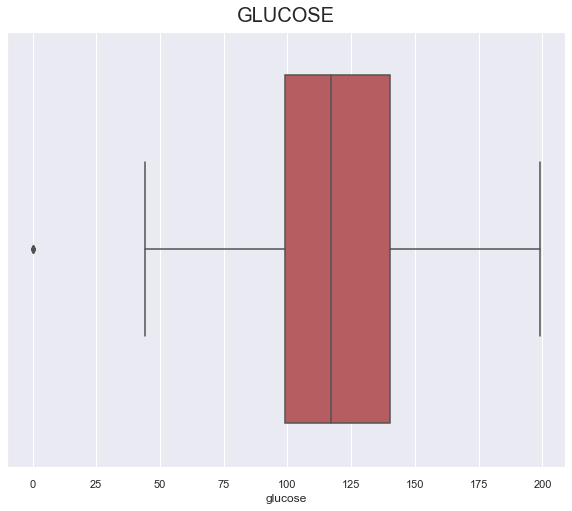

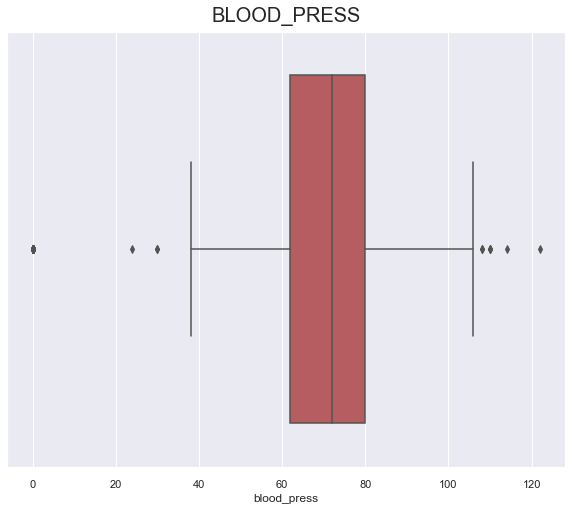

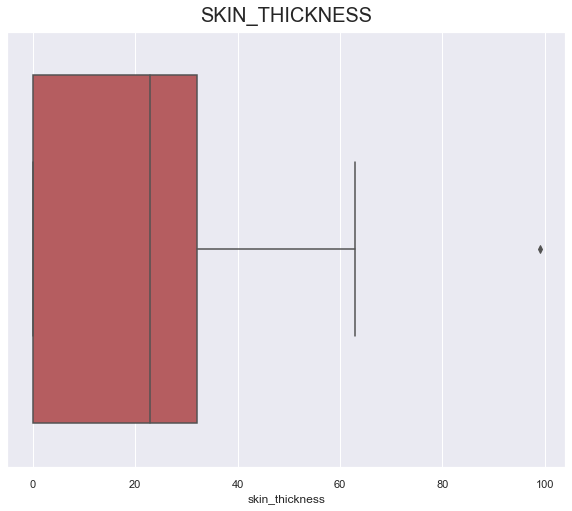

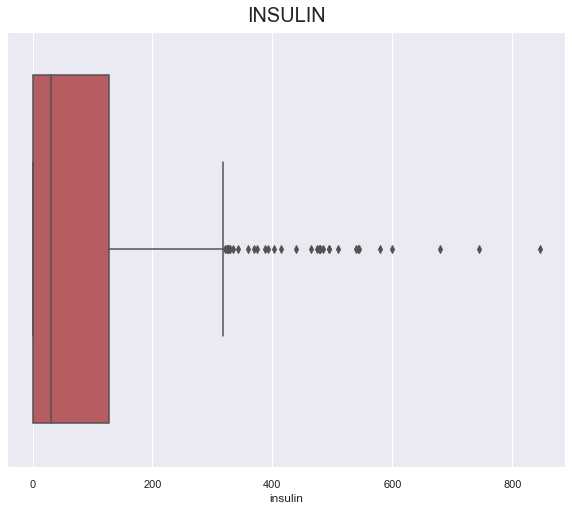

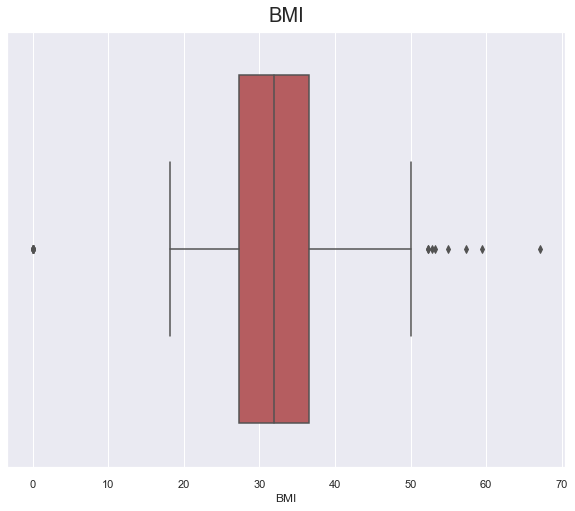

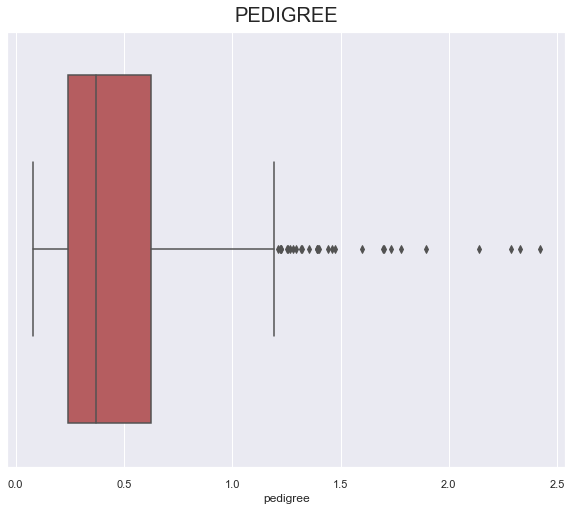

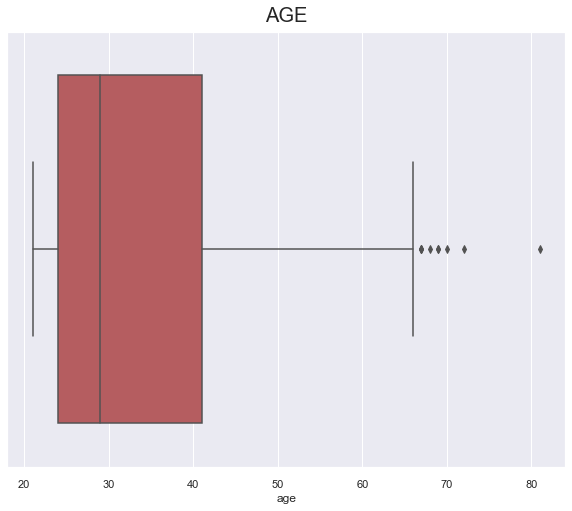

In [290]:
columns = df.drop('class', axis=1)
for column in columns:
    sns.set(rc={"figure.figsize":(10, 8)})
    sns.boxplot(x=df[column], color='r')
    plt.title(column.upper(), fontsize=20, pad=10)
    plt.show()

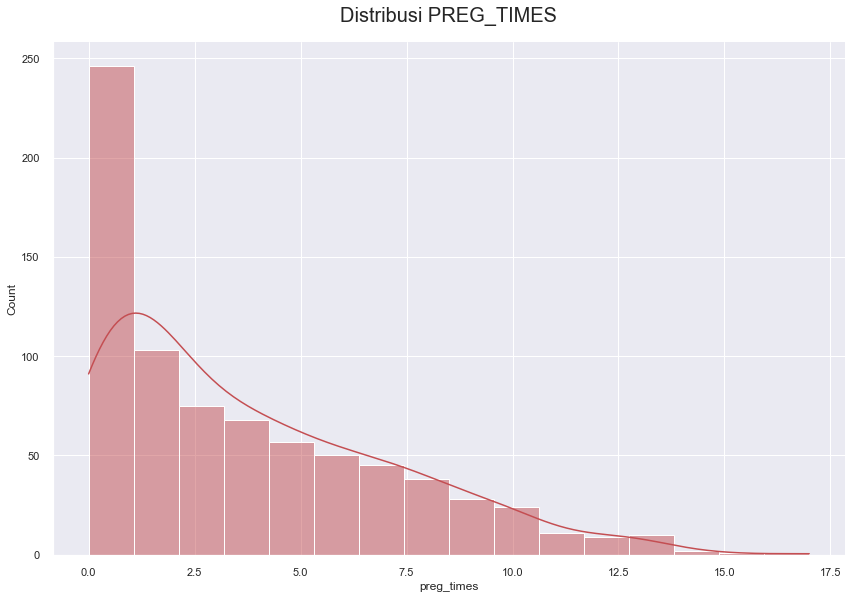

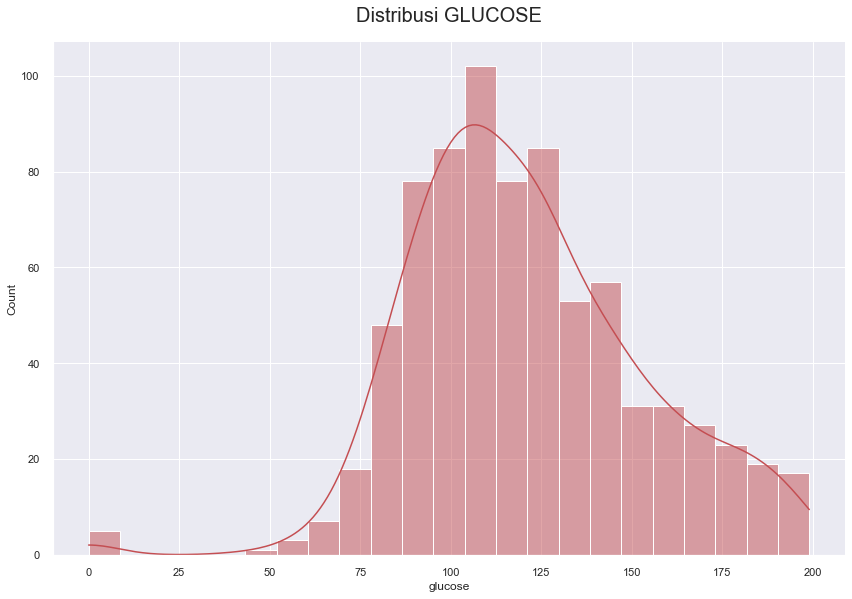

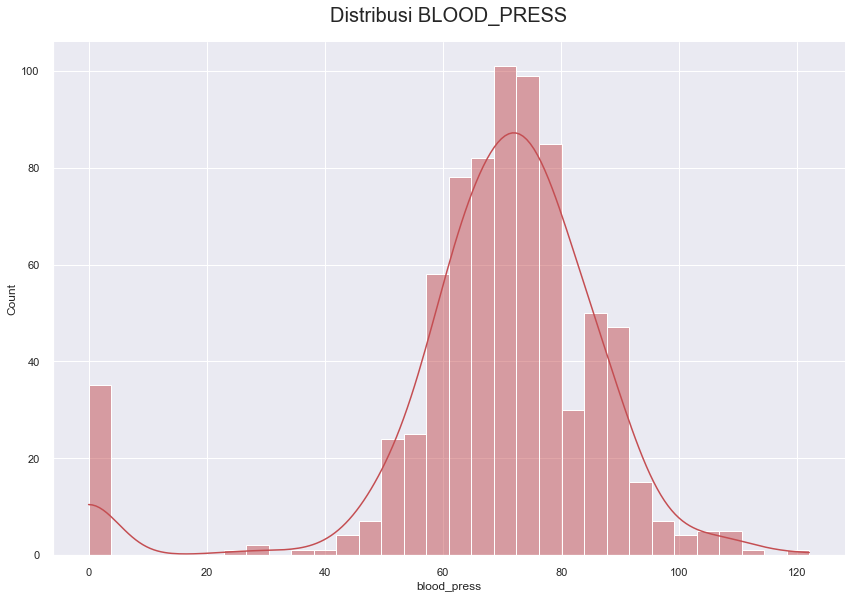

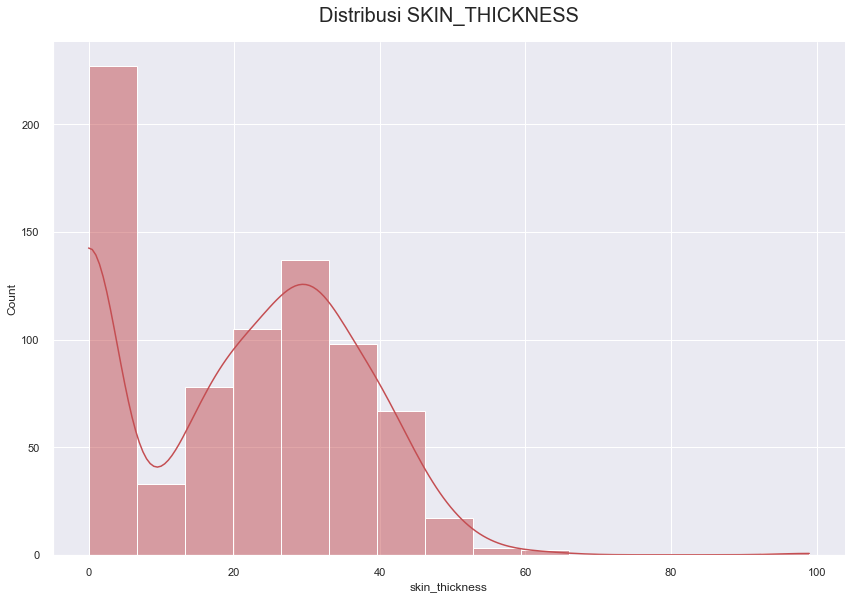

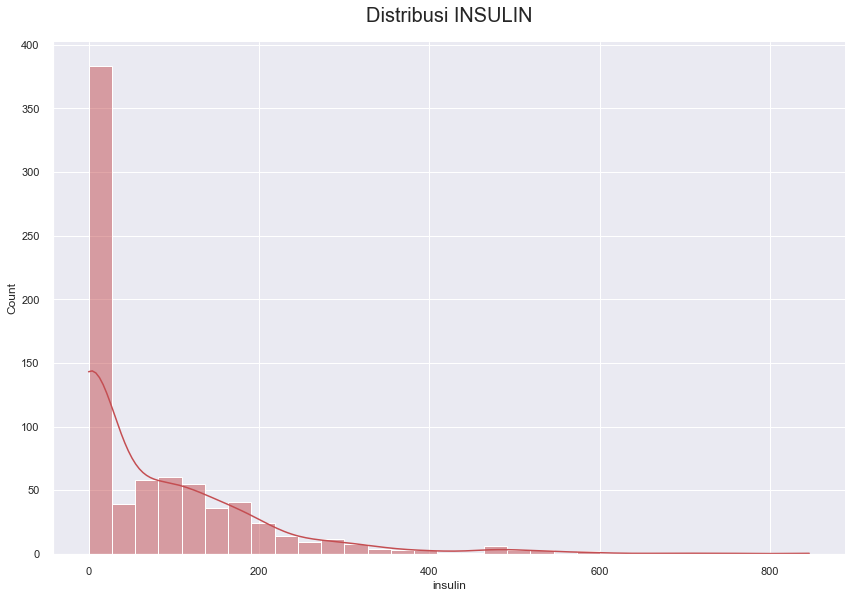

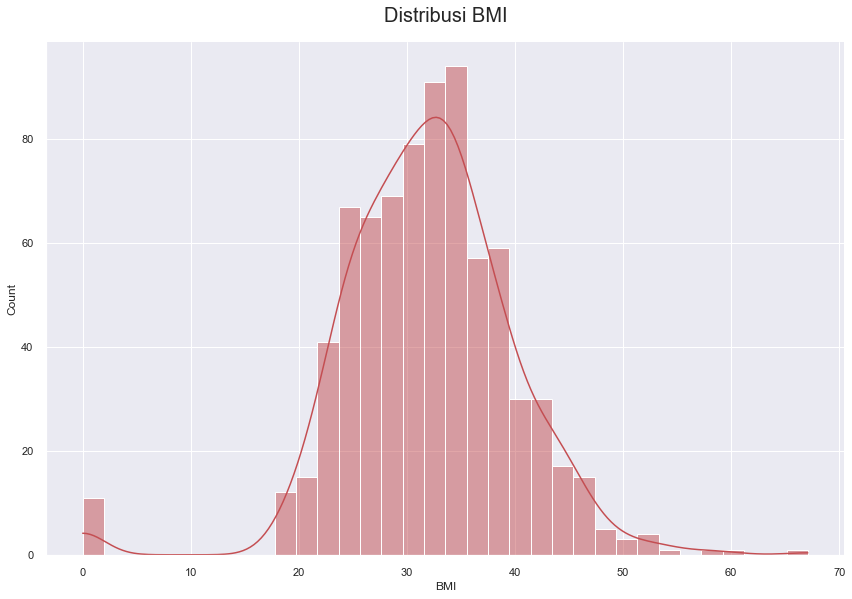

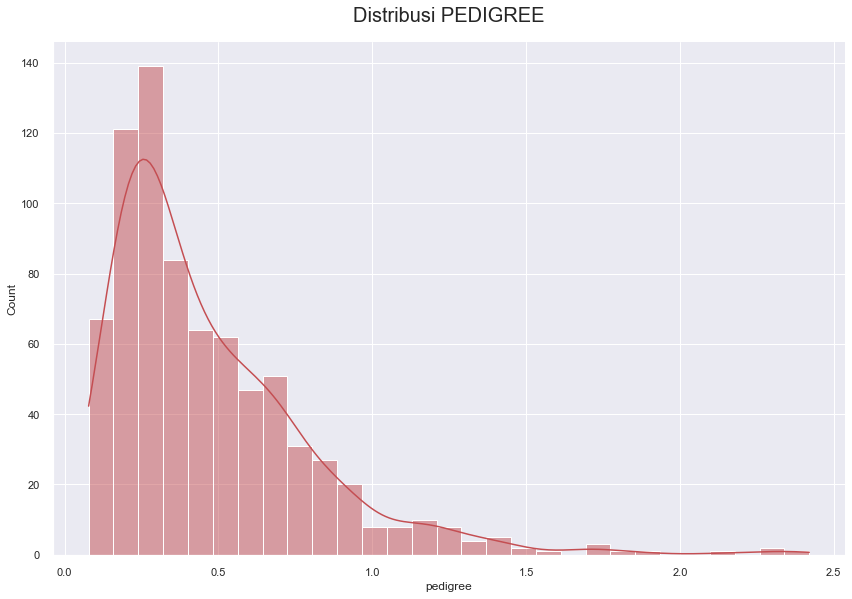

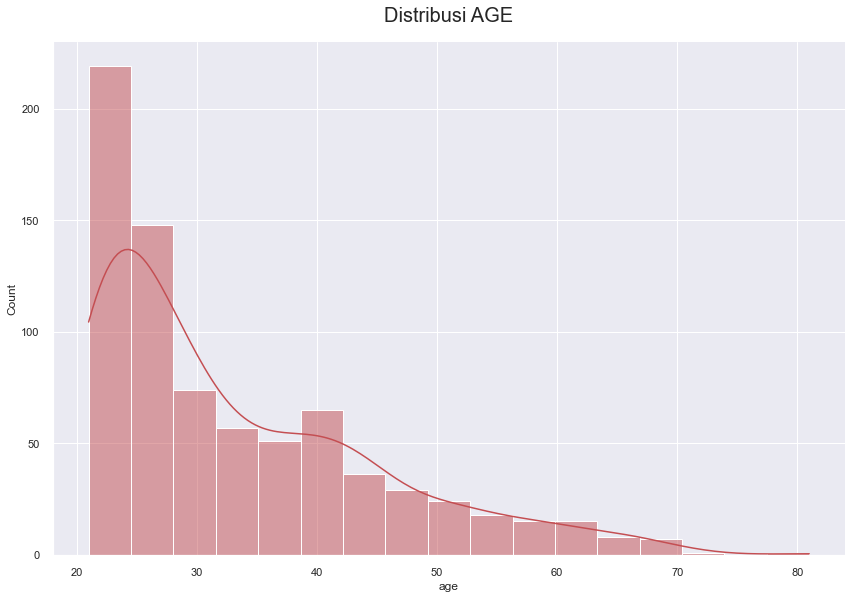

In [291]:
columns = df.drop('class', axis=1)
for column in columns:
    sns.displot(data=df[column],height=8, aspect=1.5, kde=True, color='r')
    plt.title(f'Distribusi {column.upper()}', fontsize=20, pad=20)
    plt.show()

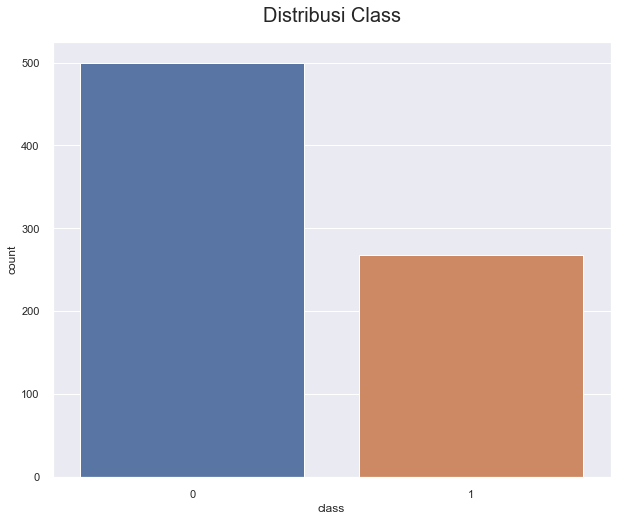

In [292]:
sns.countplot(data=df, x='class')
plt.title('Distribusi Class', fontsize=20, pad=20)
plt.show()

In [293]:
df['class'].value_counts()

0    500
1    268
Name: class, dtype: int64

## Data Preparation

### Handling Outliers with Z-score

In [345]:
#Function threshold Z-score
def threshold(z,d):
    for i in np.arange(3,5,0.2):
        data=d.copy()
        data=data[(z<i).all(axis=1)]
        loss=(d.shape[0]-data.shape[0])/d.shape[0]*100
        print('With threshold {} data loss is {}%'.format(np.round(i,1),np.round(loss,2))) 

## Find Z-score
from scipy.stats import zscore
z=np.abs(zscore(df[df.columns]))

## Call Function
threshold(z,df[df.columns])

With threshold 3.0 data loss is 10.42%
With threshold 3.2 data loss is 9.64%
With threshold 3.4 data loss is 9.38%
With threshold 3.6 data loss is 4.95%
With threshold 3.8 data loss is 3.65%
With threshold 4.0 data loss is 3.26%
With threshold 4.2 data loss is 1.43%
With threshold 4.4 data loss is 1.17%
With threshold 4.6 data loss is 0.91%
With threshold 4.8 data loss is 0.91%


In [350]:
new_df = df[(z < 3.6).all(axis=1)]

print(f'Total Data before Handling outliers : {df.shape[0]}')
print(f'Total Data after Handling outliers : {new_df.shape[0]}')

Total Data before Handling outliers : 768
Total Data after Handling outliers : 730


### Split data

In [351]:
X = new_df.drop('class', axis=1)
y = new_df['class']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=78)

In [352]:
print(f'Total Training data : {X_train.shape[0]}')
print(f'Total Testing data : {X_test.shape[0]}')

Total Training data : 584
Total Testing data : 146


### Normalization

In [357]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Modeling with SVC

### Evaluate Model

In [358]:
# Function Evaluate score (accuracy)
def evaluate_model(col_name, model_dict):
    frame = pd.DataFrame(columns=['Training','Testing'], index=col_name)
    
    for name, model in model_dict.items():
        frame.loc[name, 'Training'] = model.score(X_train, y_train)
        frame.loc[name, 'Testing'] = model.score(X_test, y_test)
        
    return frame

In [359]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', C=1, gamma='auto')
svm_model.fit(X_train, y_train)

SVC(C=1, gamma='auto')

In [360]:
col_name = ['SVM']
model_dict = {'SVM':svm_model}

evaluate_model(index,model_dict)

,Training,Testing
SVM,0.813356,0.80137


### Hyper Tuning

In [385]:
from sklearn.model_selection import GridSearchCV

params = {
    'C': [0.01, 0.1, 0.5, 1, 10],
    'gamma': [0.1, 0.01, 0.001, 'auto', 'scale'],
    'kernel': ['rbf', 'poly', 'linear', 'sigmoid']
}

grid = GridSearchCV(SVC(), params)
grid.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 0.5, 1, 10],
                         'gamma': [0.1, 0.01, 0.001, 'auto', 'scale'],
                         'kernel': ['rbf', 'poly', 'linear', 'sigmoid']})

In [386]:
best_params =grid.best_params_
best_params

{'C': 0.5, 'gamma': 0.01, 'kernel': 'rbf'}

In [387]:
svm_model_tuning = SVC(**best_params)
svm_model_tuning.fit(X_train, y_train)

SVC(C=0.5, gamma=0.01)

In [388]:
col_name = ['SVM']
model_dict = {'SVM':svm_model_tuning}

evaluate_model(index,model_dict)

,Training,Testing
SVM,0.777397,0.815068


## Save File

In [338]:
import pickle

pkl_filename = "svm_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(svm_model, file)

## Load File

In [341]:
# load from pickle file
with open(pkl_filename, 'rb') as file:
    svm_model_load = pickle.load(file)

In [343]:
svm_score_load = svm_model_load.score(X_test, y_test)

print(f'Accuracy Model : {svm_score_load}')

Accuracy Model : 0.7142857142857143
